In [80]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


KMeans is an algorithm used to partition data into k distinct clusters

*It starts by selecting k centroids (initial points)*
*Each data point is assigned to the nearest centroid, forming clusters.*
*The centroids are then updated by calculating the mean of all the data points assigned to each centroid*
*Steps 2 and 3 are repeated until convergence, i.e., the centroids no longer change significantly or a specified number of iterations is reached.*

In [81]:
df=pd.read_csv(r"C:\Users\unais\Desktop\example\cluster_analisys\Mall_Customers.csv")

In [82]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


renaming the genre to gender 

.rename() function you're referring to is a method in pandas, 

In [83]:
df=df.rename(columns={'Genre':'Gender'})

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [85]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [86]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


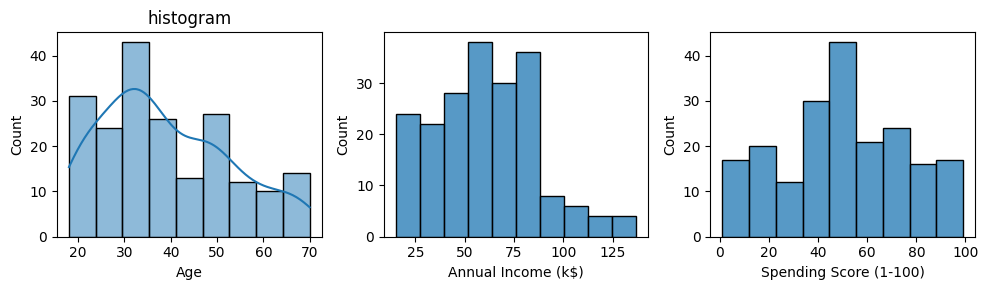

In [87]:
fig,axes=plt.subplots(1,3,figsize=(10,3))
sns.histplot(df["Age"],kde=True,ax=axes[0])
axes[0].set_title("histogram")

sns.histplot(df["Annual Income (k$)"],ax=axes[1])

sns.histplot(df["Spending Score (1-100)"],ax=axes[2])
plt.tight_layout()

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

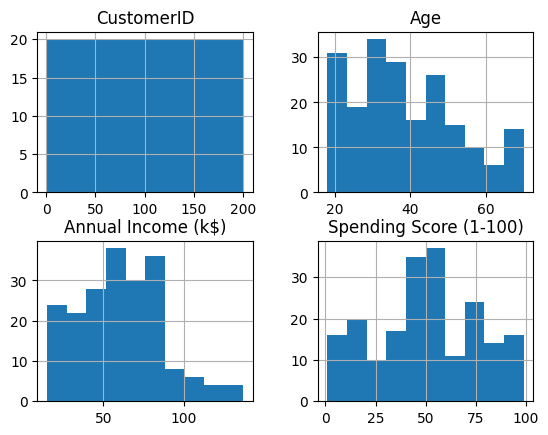

In [88]:
df.hist()

In [89]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [90]:
df_new=df.groupby("Gender").size()


In [91]:
df_new

Gender
Female    112
Male       88
dtype: int64

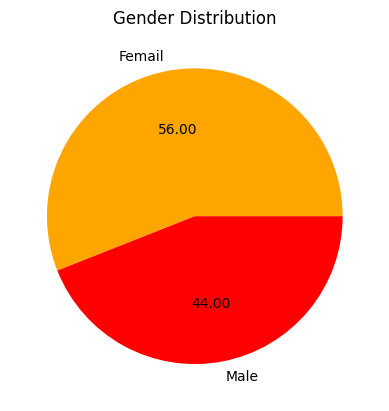

In [92]:
df_new.plot(kind='pie',colors=['orange','red'],subplots=True,autopct= '%.2f',
            labels=['Femail',"Male"])

plt.title('Gender Distribution')
plt.show()

Text(0.5, 1.0, 'Age VS Spending_score')

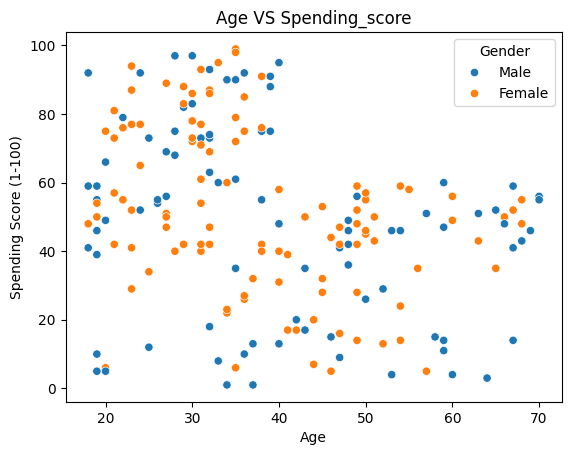

In [93]:
sns.scatterplot(df,x=df["Age"],y=df['Spending Score (1-100)'],hue='Gender')
plt.title("Age VS Spending_score")


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

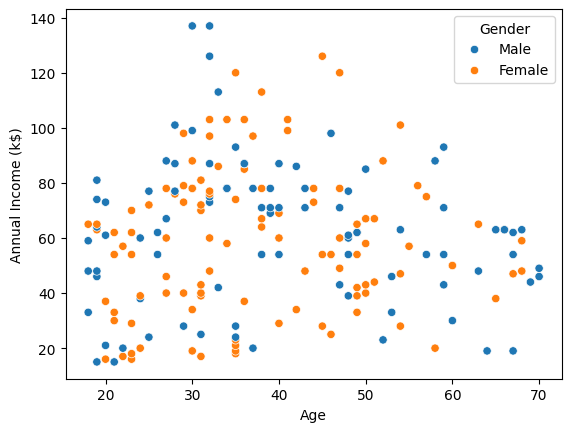

In [94]:
sns.scatterplot(df,x='Age',y='Annual Income (k$)',hue='Gender')


In [95]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [96]:
X= df.iloc[:,[3,4]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Elbow Method to determine the optimal number of clusters for a KMeans clustering algorithm.

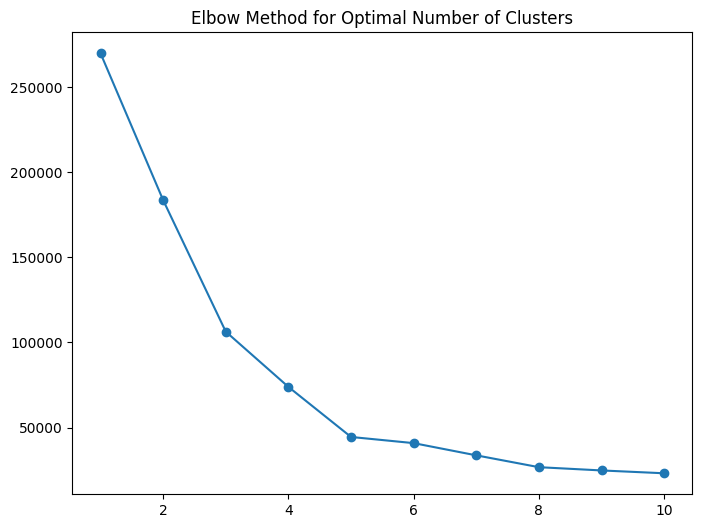

In [98]:
initial = []  # store initial values 
k_range = range(1, 11)  # tests different values of k to find the optimal number of clusters 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # Assuming X is your data
    initial.append(kmeans.inertia_)  # Store the inertia for each value of k

# Now you can use plt to plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(k_range, initial, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')

plt.show()



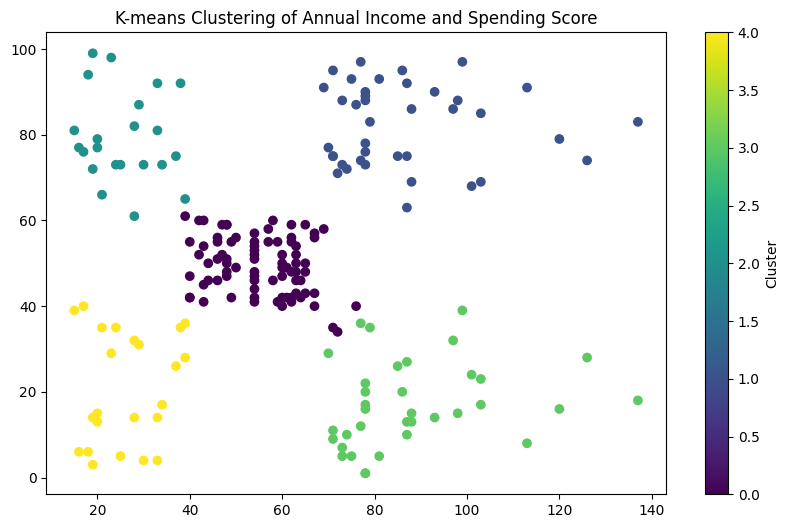

In [103]:
kmeans = KMeans(n_clusters=5, random_state=42)  # You can change the number of clusters (n_clusters)
kmeans.fit(X)

# Add the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'], cmap='viridis', marker='o')
plt.title('K-means Clustering of Annual Income and Spending Score')

plt.colorbar(label='Cluster')